# Travail Pratique: Création d'un Modèle GoogLeNet Miniature

## GoogLeNet: Un Aperçu Historique
GoogLeNet est un modèle de réseau neuronal convolutif profond qui a été proposé par des chercheurs de Google, d'où son nom. Le modèle a été introduit pour la première fois en 2014 dans le papier de recherche intitulé "[Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842)", et a remporté le défi de la classification visuelle d'ImageNet (ILSVRC) cette même année.
Le modèle est plus particulièrement célèbre pour deux de ses caractéristiques uniques :



### Inception Module :
L'Inception Module est une micro-architecture novatrice (ou un "bloc de construction") pour les CNN. Il est basé sur une philosophie intelligente de conception de réseau qui interroge "à quoi ressemblerait une bonne solution locale" pour la conception de réseau.

Le Module Inception a introduit l'idée d'avoir plusieurs opérations de convolution de différentes tailles (1x1, 3x3, 5x5) en parallèle dans un même niveau de l'architecture, permettant au CNN d'apprendre des caractéristiques à différentes échelles. Cela a également amené à une plus grande efficacité en termes de calcul.

![inception](../asset/inception.png)

### Profondeur du réseau :
GoogLeNet a été l'un des premiers réseaux neuronaux profonds avec 22 couches de profondeur. En utilisant l'Inception Module et une grande profondeur, GoogLeNet a pu atteindre des performances élevées sur diverses tâches de vision par ordinateur, y compris la classification des images.
Il convient de noter que même si GoogLeNet a lancé l'idée originale du Module Inception, de nombreuses variantes et améliorations ont été introduites depuis, telles que Inception-v2, Inception-v3 et Inception-v4, chacune améliorant les performances et l'efficacité de la précédente.

![googlenet architecture](../asset/googlenet_architecture.png)

Pour l'anecdote, ce modèle compte 25 millions de paramètres, en 2014 il était assser difficile pour l'utilisateur classique de le train  Maintenant, un LLM classique comme Mistral comporte 7 milliards de paramètres, ou comme ChatGPT-3.5 qui en compte 175 milliards !!!

## Objectif

Au cours de ce TP, nous allons apprendre à utiliser les Réseaux de neurones à convolution (CNN) pour construire un modèle miniature GoogLeNet avec l'Inception Module. L'algorithme sera utilisé pour le torchvision.datasets.CIFAR10 dataset.

Nous alons réaliser une version minature de celui-ci

![GoogleNet](../asset/mini_googlenet.png)

L'architecture MiniGoogLeNet se compose de blocs de construction incluant un module de convolution, un module Inception et un module de sous-échantillonnage (downsample). Ces modules sont assemblés pour former l'architecture globale.


**Note** 32 + 32 filters veux dire 32 filtre en 1X1 et 32 filtres en 3x3

![note_filters](../asset/note_inception.png)

## Ressources

- [Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842)
- [Torch conv2D](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)

In [ ]:
!pip install -q -U scikit-learn torch torchvision matplotlib

## Préparation des Données
Téléchargez et préparez votre jeu de données CIFAR10

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


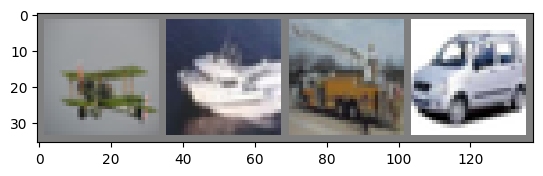

plane ship  truck car  
Shape torch.Size([4, 3, 32, 32])


In [4]:
def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Batch, color chan, width, height
print("Shape", images.shape)

In [ ]:
def convolution_module(in_channels, out_channels, kernel_size, stride=1, padding="same"):
    return nn.Sequential()


class MiniInception(nn.Module):
    def __init__(self, in_channels, n1x1, n3x3):
        super(MiniInception, self).__init__()

    def forward(self, x):
        return torch.cat([], dim=1)


class Downsample(nn.Module):
    def __init__(self, in_channels, n3x3):
        super(Downsample, self).__init__()

    def forward(self, x):
        # Produce 2*n3x3 filters with the cat
        return torch.cat([], dim=1)


class MiniGoogLeNet(nn.Module):
    def __init__(self, in_channels, classes):
        super(MiniGoogLeNet, self).__init__()

        self.mini_googlenet = nn.Sequential(
            convolution_module(in_channels, 96, kernel_size=3)
        )


cnn = MiniGoogLeNet(3, 10)

cnn.mini_googlenet(images[:1]).shape